<a href="https://colab.research.google.com/github/mariyagolchin/Breast-Cancer-Classification-Using-a-Support-Vector-Machine/blob/main/Breast_Cancer_Classification_Using_a_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Classification Using a Support Vector Machine**

https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC


In [2]:
#import Data
df_cancer = pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


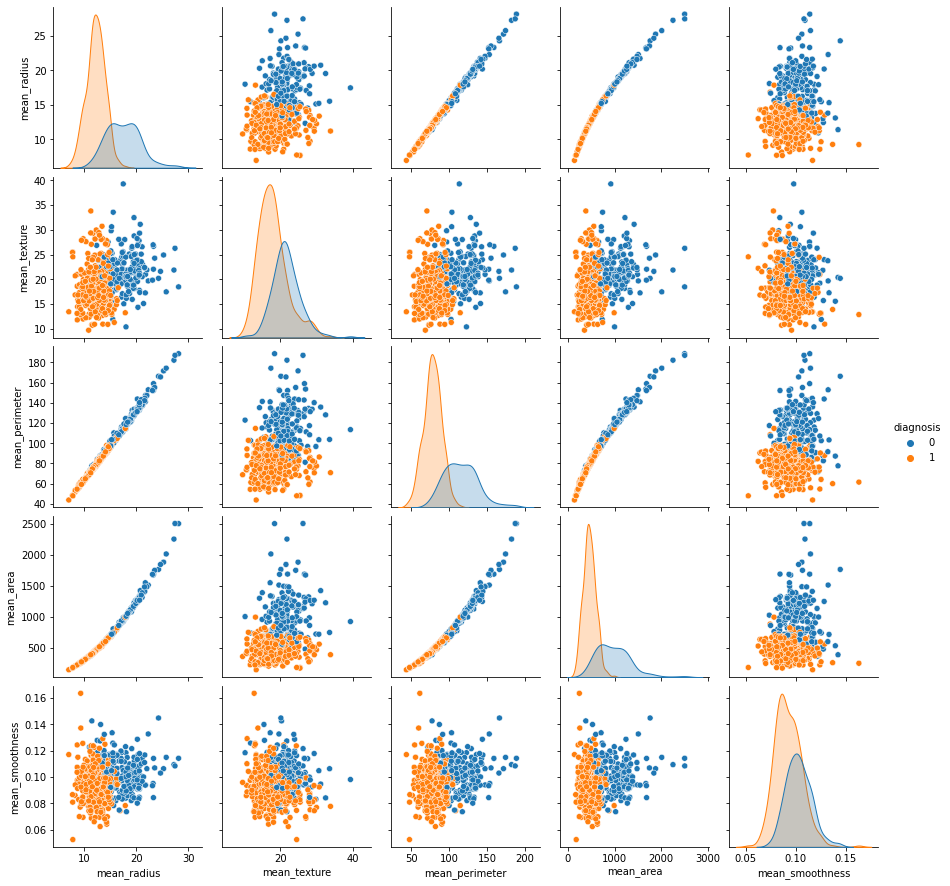

In [3]:
#get some information about our Data-Set
df_cancer.info()
df_cancer.describe()
#visualizing data
sns.pairplot(df_cancer, hue = 'diagnosis')

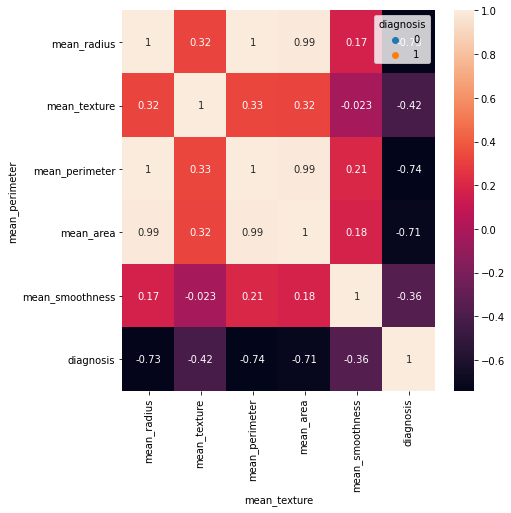

In [4]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

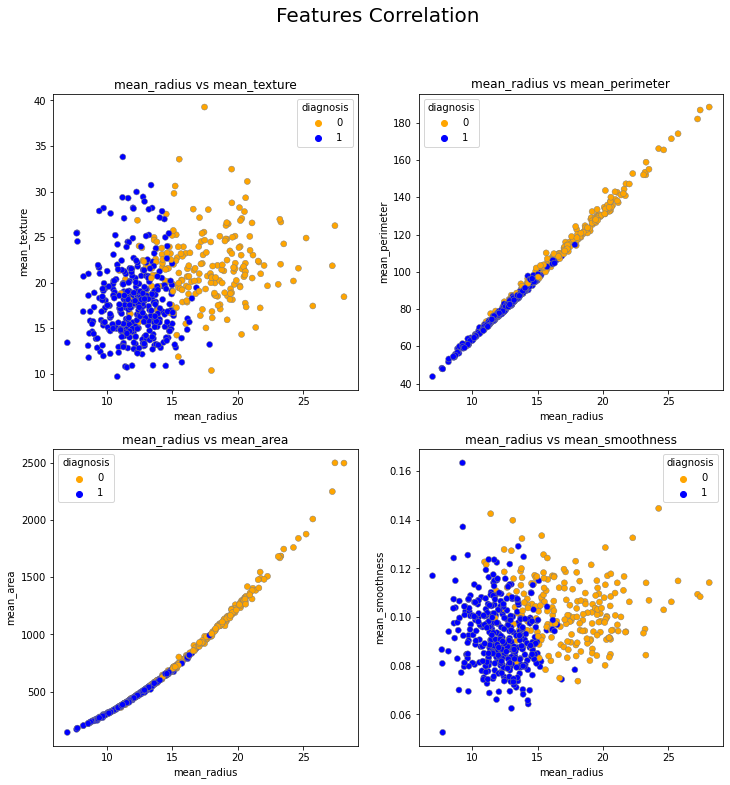

In [5]:
#visualizing features correlation
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')
fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

In [24]:
#import Data
df_cancer = pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

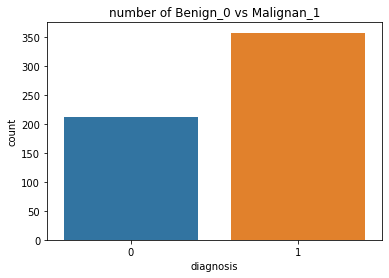

In [26]:
#visualizing diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign_0 vs Malignan_1')


Text(0.5, 1.0, 'Corr. between features and target')

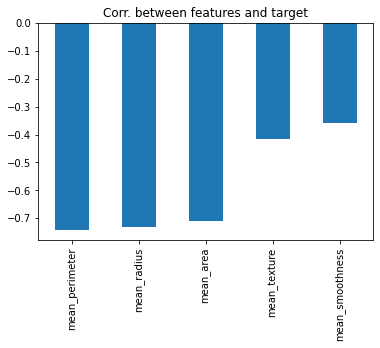

In [27]:
# correlation between features
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

In [28]:
#define X variables and our target(y)
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values

In [32]:
#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [33]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

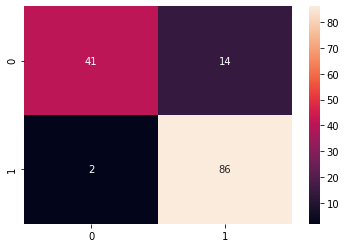

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        55
           1       0.86      0.98      0.91        88

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.88       143
weighted avg       0.90      0.89      0.88       143



# **Step 6: What Can We Do to Improve Our Model?**
1. **Data** **normalization**
2. **SVM** **parameters** **optimization**

# 1. **Data** **normalization** 

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.92      0.95      0.94        88

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



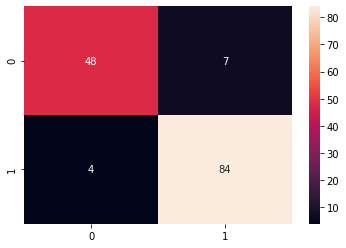

In [37]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

# 2. SVM parameters optimization

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.826, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.835, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.894, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.826, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.92      0.94      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



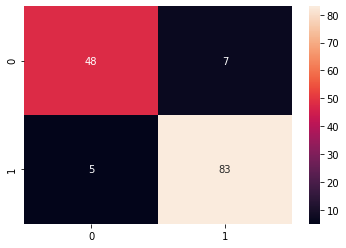

In [38]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))